In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Préparation des données

## Vue d'ensemble

In [24]:
df = pd.read_csv("../data/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Nettoyage

On enlève les colonnes "id" et "Unnamed: 32" qui ne semblent pas pertinentes pour notre tâche de classification

In [27]:
cols_to_drop = [c for c in ['id', 'Unnamed: 32'] if c in df.columns]
df = df.drop(columns=cols_to_drop)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


De plus, on remarque que la colonne target "diagnosis" contient des chaines de caractères. On va encoder cela comme suit : 

- M (malign) -> 1
- B (benign) -> 0

Ainsi on marque la présence de la malade comme 1 et son absence comme 0

In [28]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


On vérifie si il y a des valeurs manquantes, si oui on supprime la ligne correspondante

In [29]:
print(df.isna().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Il ne semble pas avoir de NaN dans le dataset

# Analyse exploratoire

### Description

In [30]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
desc = x.describe()
desc.insert(0, 'stat', desc.index)
desc.reset_index(drop=True).to_csv("../data/describe.csv", index=False)
print(desc)

        stat  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  count   569.000000    569.000000      569.000000   569.000000   
mean    mean    14.127292     19.289649       91.969033   654.889104   
std      std     3.524049      4.301036       24.298981   351.914129   
min      min     6.981000      9.710000       43.790000   143.500000   
25%      25%    11.700000     16.170000       75.170000   420.300000   
50%      50%    13.370000     18.840000       86.240000   551.100000   
75%      75%    15.780000     21.800000      104.100000   782.700000   
max      max    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630     

### Comparaison malin et bénin

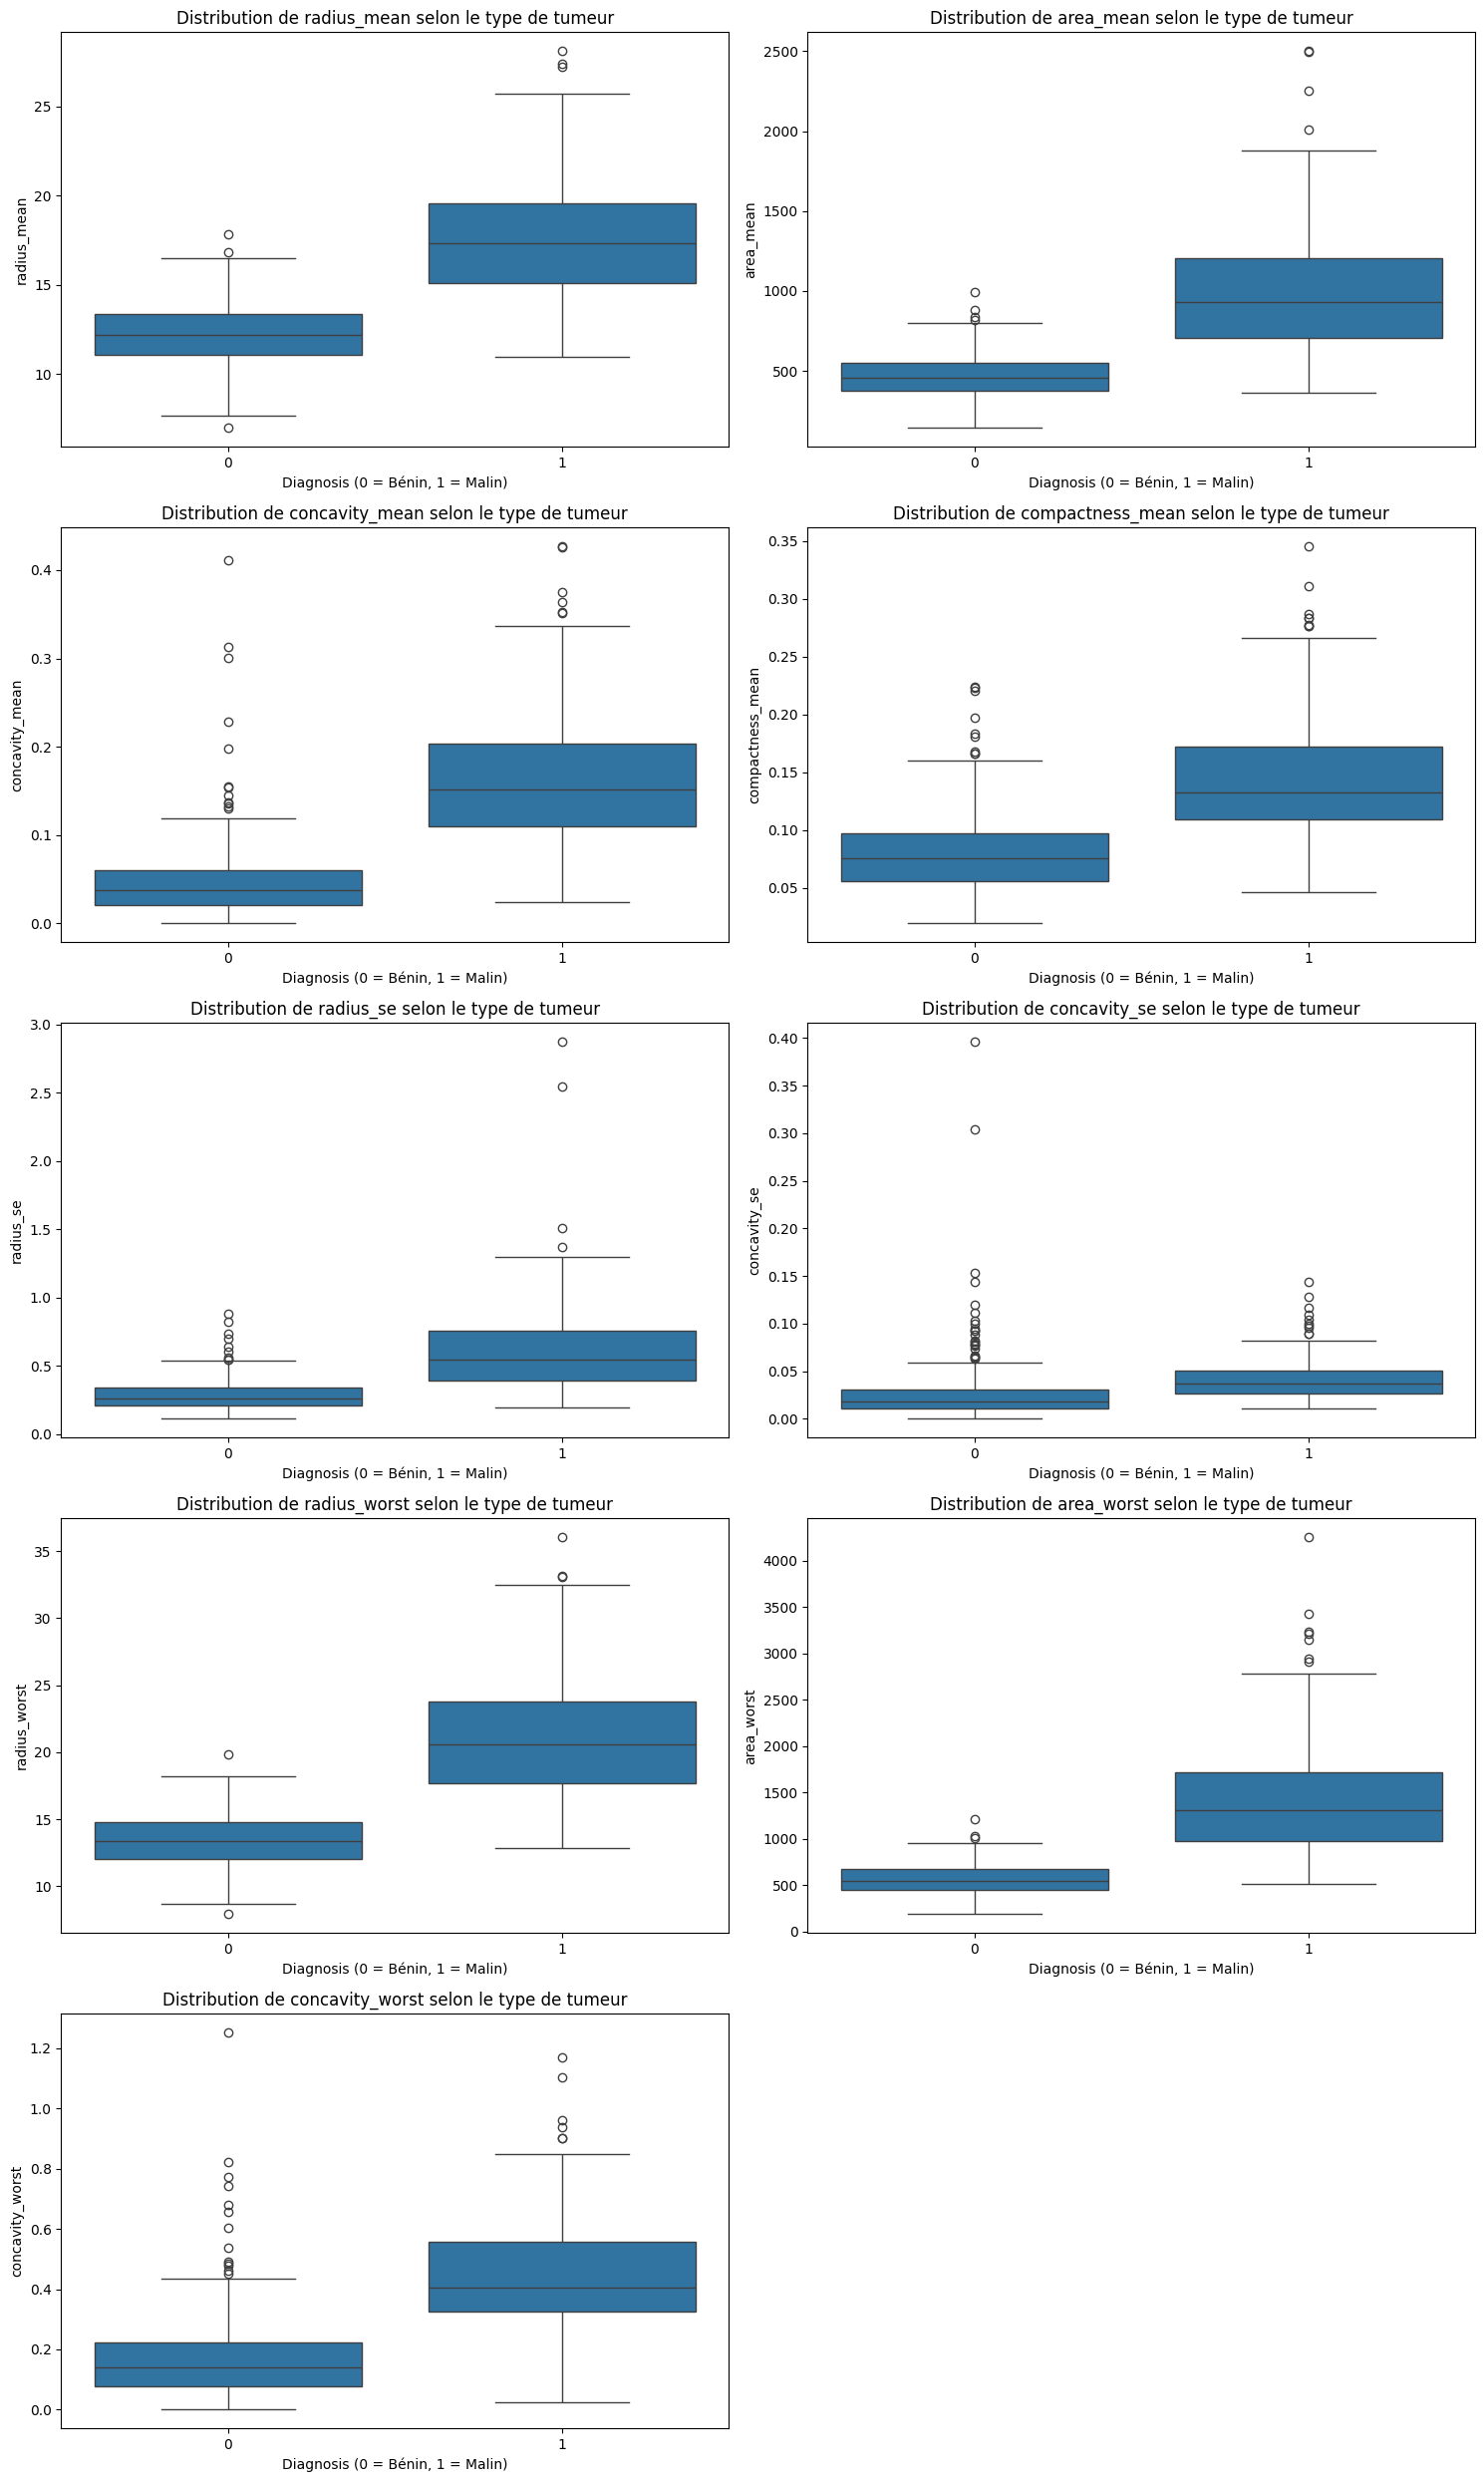

In [32]:
variables_a_tester = [
    'radius_mean', 'area_mean', 
    'concavity_mean', 'compactness_mean',
    'radius_se', 'concavity_se',
    'radius_worst', 'area_worst', 'concavity_worst'
]

plt.figure(figsize=(15, 25))

for i, var in enumerate(variables_a_tester, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df['diagnosis'], y=df[var])
    plt.title(f"Distribution de {var} selon le type de tumeur")
    plt.xlabel("Diagnosis (0 = Bénin, 1 = Malin)")
    plt.tight_layout()

plt.show()

In [33]:
df.groupby('diagnosis')[variables_a_tester].mean()

,radius_mean,area_mean,concavity_mean,compactness_mean,radius_se,concavity_se,radius_worst,area_worst,concavity_worst
diagnosis,,,,,,,,,
0,12.146524,462.790196,0.046058,0.080085,0.284082,0.025997,13.379801,558.899440,0.166238
1,17.462830,978.376415,0.160775,0.145188,0.609083,0.041824,21.134811,1422.286321,0.450606


### Corrélation entre features

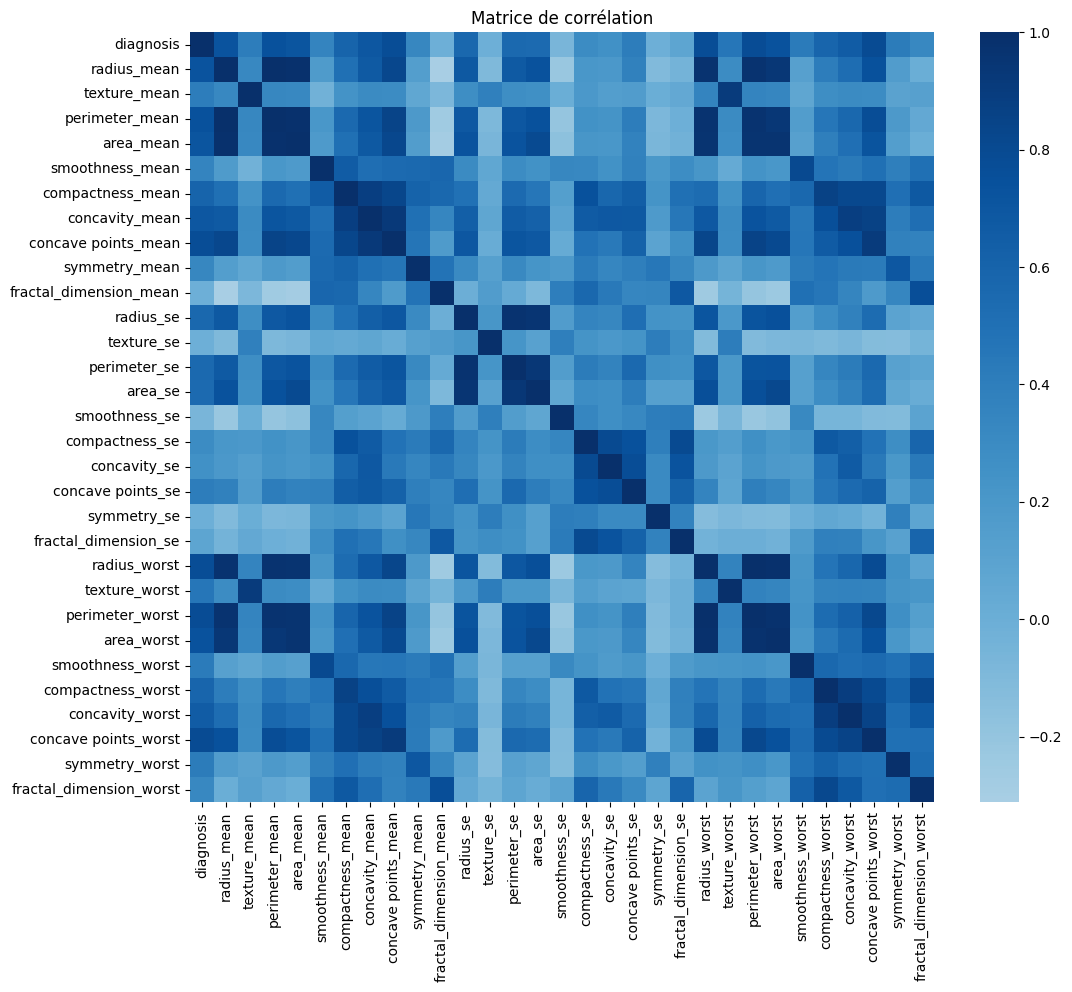

In [34]:
plt.figure(figsize=(12,10))
corr = df.corr()
corr['diagnosis'].sort_values(ascending=False)
sns.heatmap(corr, cmap='Blues', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [35]:
df.to_csv("../data/data_clean.csv")

In [ ]:
df1 = pd.read_csv("../data/data_clean.csv")
df1 = df1.drop(columns=["Unnamed: 0"], errors="ignore")

### Répartition des classes

diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


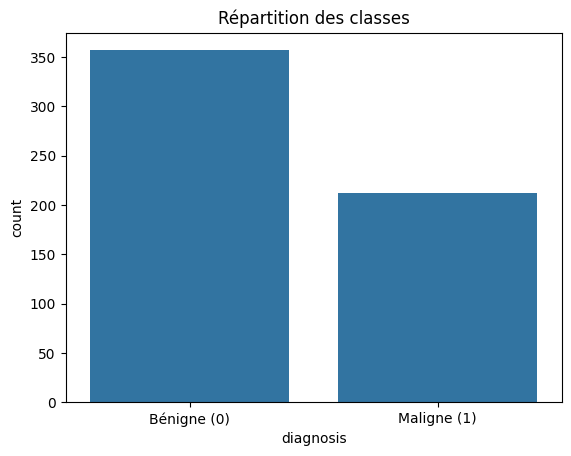

In [44]:
# Comptes bruts
counts = df1["diagnosis"].value_counts()
print(counts)

# Pourcentages
percent = df1["diagnosis"].value_counts(normalize=True) * 100
print(percent)

# Petit barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x="diagnosis", data=df1)
plt.xticks([0, 1], ["Bénigne (0)", "Maligne (1)"])
plt.title("Répartition des classes")
plt.show()

#### Un léger déséquilibre en faveur de la classe bénigne, qui sera pris en compte lors du découpage train/test et de l'évaluation

In [38]:
desc = df1.describe().T
desc.to_csv("../data/describe.csv")
desc

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


### Visualisation des distributions par classes de quelques features 

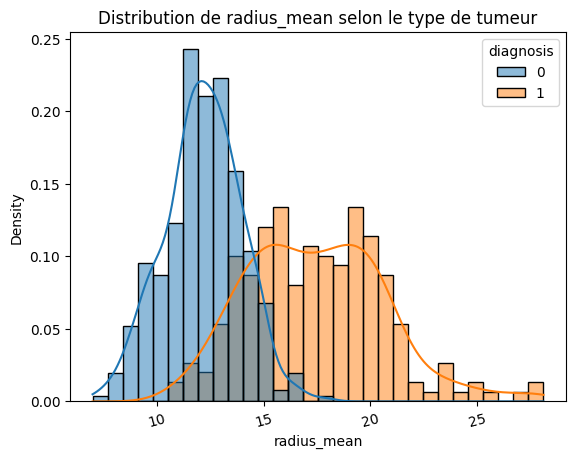

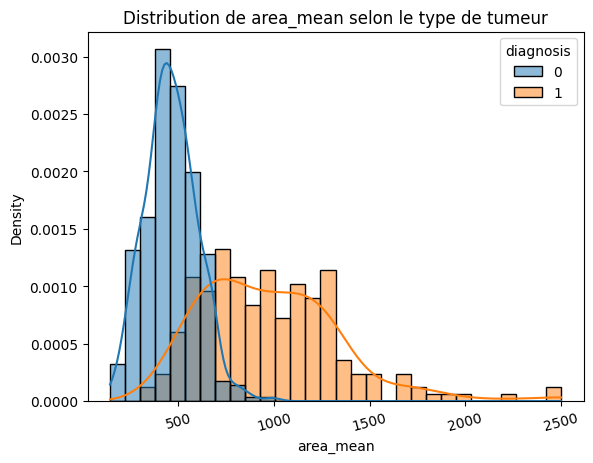

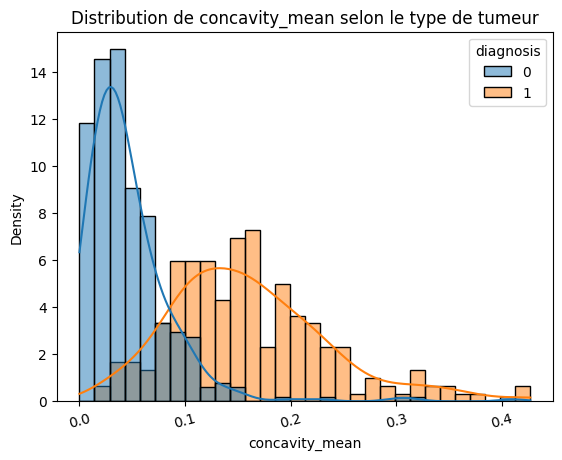

In [39]:
features_a_plot = ["radius_mean", "area_mean", "concavity_mean"]

for feat in features_a_plot:
    plt.figure()
    sns.histplot(data=df, x=feat, hue="diagnosis",
                 bins=30, kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution de {feat} selon le type de tumeur")
    plt.xticks(rotation=15)
    plt.show()

#### Les histogrammes montrent que la distribution des valeurs est globalement décalée vers la droite pour les tumeurs malignet, ce qui confirment les différences obersvées sur les boxplots

### Diagramme 2D via PCA pour visualiser la séparation

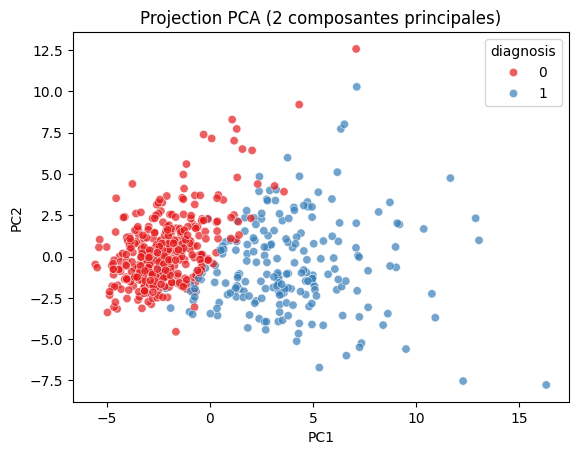

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df1.drop(columns=["diagnosis"])
y = df1["diagnosis"]

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.7)
plt.title("Projection PCA (2 composantes principales)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="diagnosis")
plt.show()